In [2]:
# Find an analytic solution to the problem

from sympy import symbols, Eq, nonlinsolve, sin, cos, pi, S
a_vx, a_vy, a_m, ahat_vx, ahat_vy =  symbols("a_vx, a_vy, a_m, ahat_vx, ahat_vy")
b_vx, b_vy, b_m, bhat_vx, bhat_vy =  symbols("b_vx, b_vy, b_m, bhat_vx, bhat_vy")
c_vx, c_vy, c_m, chat_vx, chat_vy =  symbols("c_vx, c_vy, c_m, chat_vx, chat_vy")

# conservation of energy
a_m, b_m, c_m = 1, 1, 1
a_vx, b_vx, c_vx = 1, 0, 0
a_vy, b_vy, c_vy = S(0), S(0), S(0)
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2 + c_m * (c_vx**2 + c_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2 + c_m * (chat_vx**2 + chat_vy**2) / 2
eq1 = Eq(energy_before*2, energy_after*2)
# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy + c_m * c_vy, a_m * ahat_vy + b_m * bhat_vy + c_m * chat_vy)

# always 30 degrees up or down
eq4 = Eq(bhat_vx / cos(pi/6), bhat_vy / sin(pi/6))
eq5 = Eq(chat_vx / cos(-pi/6), chat_vy / sin(-pi/6))

minipool = nonlinsolve([eq1, eq2, eq3, eq4, eq5], [ahat_vx, bhat_vx, bhat_vy, chat_vx, chat_vy])
minipool

{(-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5, -sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 + sqrt(3 - 15*ahat_vy**2)/10 + sqrt(3)/10, sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 - sqrt(3)*sqrt(1 - 5*ahat_vy**2)/10 - sqrt(3)/10), ((3*sqrt(1 - 5*ahat_vy**2) + 2)/5, -sqrt(3)*ahat_vy/2 - 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 - sqrt(3 - 15*ahat_vy**2)/10 + sqrt(3)/10, sqrt(3)*ahat_vy/2 - 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 + sqrt(3)*sqrt(1 - 5*ahat_vy**2)/10 - sqrt(3)/10)}

In [35]:
minipool0 = list(minipool)[0]
minipool1 = list(minipool)[1]
vx, _, _, _, _ = minipool0
vx1, _, _, _, _ = minipool1
vx

-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5

In [84]:
import sympy as sp

a = sp.Symbol("a", real=True)
vx_as_a = sp.im(vx).subs(sp.im(ahat_vy), 0).subs(sp.re(ahat_vy), a)
vx_as_a

vx_solve = sp.solve(vx_as_a, a)
print([float (x) for x in vx_solve])
print(vx_solve)

[-0.4472135954999579, 0.4472135954999579]
[-sqrt(5)/5, sqrt(5)/5]


In [85]:
print([float(vx.subs(ahat_vy, s)) for s in vx_solve])
[vx.subs(ahat_vy, s) for s in vx_solve]

[0.4, 0.4]


[2/5, 2/5]

In [25]:
import sympy as sp

vy = sp.solve(Eq(vx, ahat_vx), ahat_vy)
vy[0]

-sqrt(-5*ahat_vx**2 + 4*ahat_vx + 1)/3

In [23]:
vx

-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5

In [27]:
print(Eq(vx, ahat_vx))

Eq(-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5, ahat_vx)


In [31]:
vx.subs(ahat_vy, "y")

2/5 - 3*sqrt(1 - 5*y**2)/5

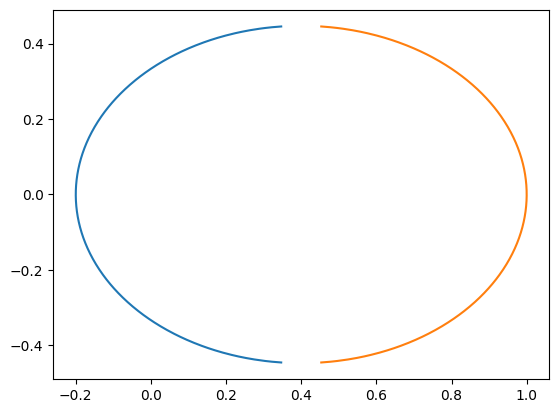

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def plotter(x_from_y_0, x_from_y_1 = None, inc=1000):
    y = np.linspace(-1, 1, inc)
    x = []
    x1 = []
    for yi in y:
        xi = x_from_y_0(yi)
        x.append(complex(xi))
        if x_from_y_1 is not None:
            xi1 = x_from_y_1(yi)
            x1.append(complex(xi1))
    x = np.array(x)
    x1 = np.array(x1)

    # filter out complex numbers
    is_real = np.isreal(x)
    plt.plot(x[is_real], y[is_real])
    is_real = np.isreal(x1)
    plt.plot(x1[is_real], y[is_real])
plotter(lambda yi: vx.subs(ahat_vy, yi), lambda yi: vx1.subs(ahat_vy, yi))
# plotter(lambda yi: vx.subs(ahat_vy, yi))


In [56]:
print([float (x) for x in vx_solve])
vx_solve

[-0.4472135954999579, 0.4472135954999579]


[-sqrt(5)/5, sqrt(5)/5]

In [59]:
vx

-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5

o:\programs\perfect-physics\.conda\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


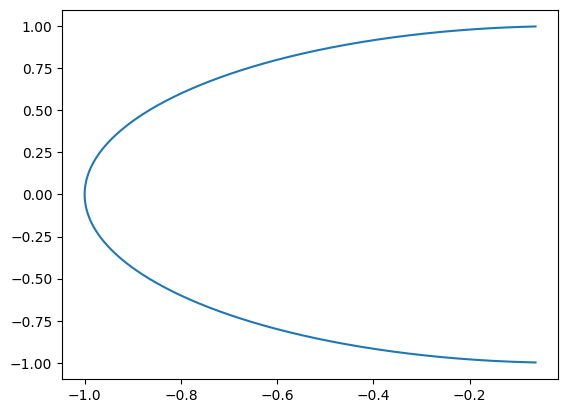

In [82]:
from sympy import sqrt

plotter(lambda yi: ((vx-.4)/.6).subs(ahat_vy, yi*(sqrt(5)/5)))

In [89]:
norm = ((vx-S(4)/10)/(S(6)/10)).subs(ahat_vy, y*(sqrt(5)/5))
print(norm)
norm

-sqrt(1 - y**2)


-sqrt(1 - y**2)

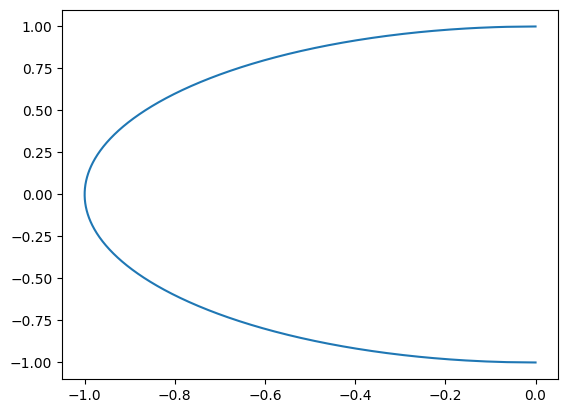

In [91]:
y_lin = np.linspace(-1, 1, 1000)
x_lin = np.array([-sqrt(1 - yi**2) for yi in y_lin])
plt.plot(x_lin, y_lin)

In [96]:
sp.simplify(sp.expand((-sqrt(1 - y**2)-x)**2))

x**2 + 2*x*sqrt(1 - y**2) - y**2 + 1

In [97]:
import sympy as sp

x, y = sp.symbols('x y')

# Given equation
eq = (-sp.sqrt(1 - y**2) - x)**2

# Expand and simplify
standard_form = sp.expand(eq).simplify()

# Rearrange the equation into the standard circle form
circle_eq = sp.Eq(standard_form, 0)

print("Standard circle equation:", circle_eq)


Standard circle equation: Eq(x**2 + 2*x*sqrt(1 - y**2) - y**2 + 1, 0)
